## Burgers Equation

$$ \frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2} $$

In [180]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft 

## Initial function which we will use

In [181]:
def initial_condition(x):
    return -np.sin(np.pi*x)

#### Taking the initial conditions

In [182]:
Range_start = -1 #initial condition of where to start
Range_stop = 1 #Final point where we will stop
Range_length = Range_stop - Range_start # Will give the length of the condition
dx = 0.01 # Will define the minimum x difference
num_points = round(Range_length/dx) + 1 # Will give the mumber of points
x_range = np.linspace(Range_start,Range_stop,int(num_points)) # Will output the x values

nu = 0.01/np.pi # Defining the value of nu

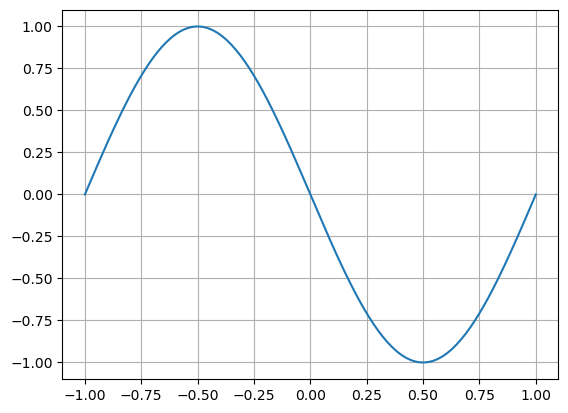

In [183]:
u_0 = initial_condition(x_range) # will give initial condition in the real space
plt.plot(x_range,u_0) # Plot for visualization
plt.grid()

##### Creating fft parameters

In [184]:
dt = 0.001 # time step value
t_max = 1 # Maximum time range
num_t_points = round(t_max)/dt + 1 # Number of points
t_range = np.linspace(0,t_max,int(num_t_points))

In [185]:
kappa = 2*np.pi*fft.fftfreq(num_points,d=dx)
#u = fft.fft(u_0)
#plt.plot(kappa,u.real)
#plt.xlim([-10,10])

In [186]:
def du_dt(u,time_range,kappa,nu):
    u_hat = fft.fft(u)
    fourier_du_dx = 1j*kappa*u_hat
    fourier_du2_dx2 = -(kappa**2)*u_hat

    real_du_dt = fft.ifft(fourier_du_dx)
    real_du2_dx2 = fft.ifft(fourier_du2_dx2)

    return (-u*real_du_dt + nu*real_du2_dx2).real

In [187]:
u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
u_record[1,1]

0.031017368831988527

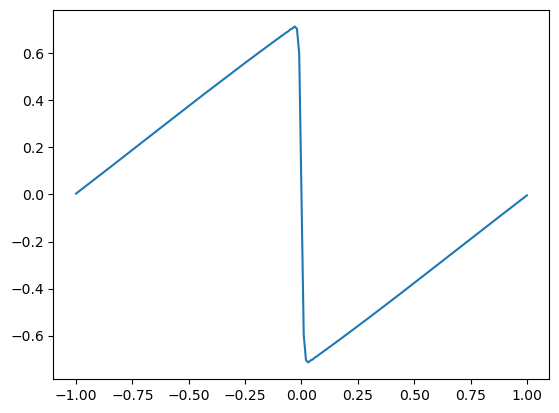

In [194]:
time_asked = int(1000*1)
plt.plot(x_range,u_record[time_asked,:])